# Libraries

In [1]:
#!/usr/bin/python
import sys, os
import math

import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.0)

In [2]:
#import mdtraj as mdt
import MDAnalysis as mda
#import nglview as nv
#from MDAnalysis.analysis.waterdynamics import MeanSquareDisplacement as MSD
import MDAnalysis.analysis.msd as msd
from scipy.stats import linregress

In [1]:
base_dir="/path/to/data"

# Time evolution of stresses

## Ensemble of 0.2 ns simulations

In [63]:
dict_simulations={
    #"1/NVT": "colbuilder_homo-sapiens_nocross/6-nvtrelaxation/nvtrelaxation.thermodynamics.dat",
    "2/NVT": "colbuilder_homo-sapiens_nocross/replica2/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "3/NVT": "colbuilder_homo-sapiens_nocross/replica3/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "4/NVT": "colbuilder_homo-sapiens_nocross/replica4/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "5/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "6/NVT": "colbuilder_homo-sapiens_nocross/replica6/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
}

In [65]:
tdf = pd.DataFrame()
dt=1e-15
for sim in dict_simulations:
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt
    df["sim"] = sim[2:]
    df["replica"] = np.int32(sim[0])-1
    tdf = pd.concat([tdf, df], ignore_index=True)

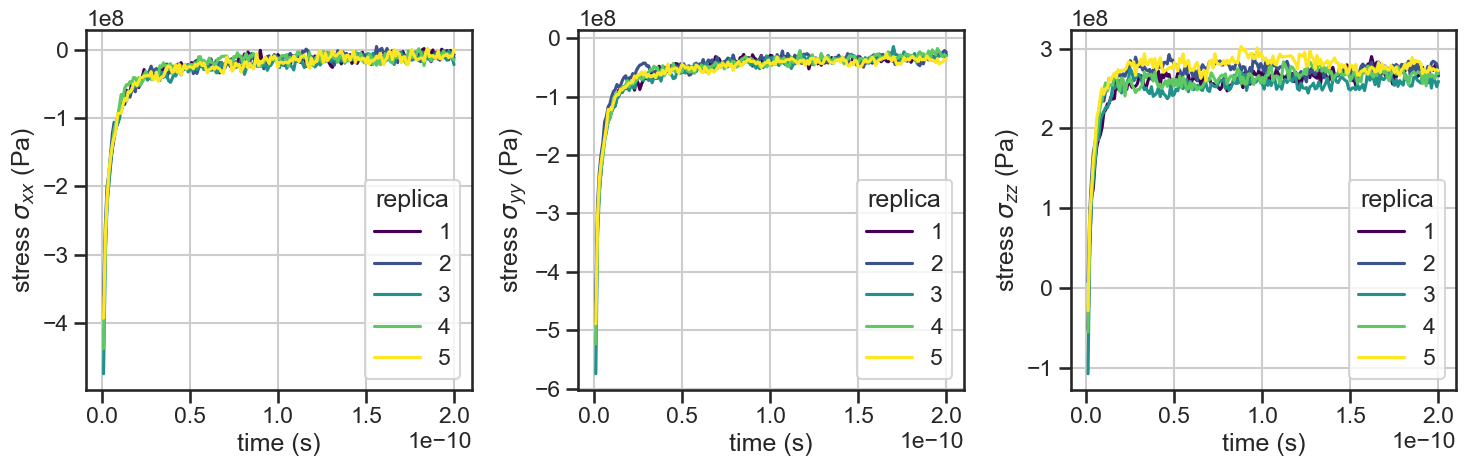

In [66]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  hue="replica",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  hue="replica",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="replica",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

## Over 20 ns

In [59]:
dict_simulations={
    "1/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "2/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/nvtrelaxation.thermodynamics.dat",
    "3/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/nvtrelaxation.thermodynamics.dat",
    "4/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/nvtrelaxation.thermodynamics.dat",
}

In [60]:
tdf = pd.DataFrame()
final_time_phase = 0.
for sim in dict_simulations:
    if float(sim[0]) > 3:
        dt=1.5e-15
    else:
        dt=1e-15
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt + final_time_phase
    final_time_phase=df["time"].iloc[-1]
    df["sim"] = sim[2:]
    df["phase"] = sim[0]
    tdf = pd.concat([tdf, df], ignore_index=True)

/var/folders/c2/qkzjh63s6y535d1y102h4vcc0000gn/T/ipykernel_35991/1722381412.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="time", y='sigma_xx', data=data,
/var/folders/c2/qkzjh63s6y535d1y102h4vcc0000gn/T/ipykernel_35991/1722381412.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="time", y='sigma_yy', data=data,
/var/folders/c2/qkzjh63s6y535d1y102h4vcc0000gn/T/ipykernel_35991/1722381412.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="time", y='sigma_zz', data=data,


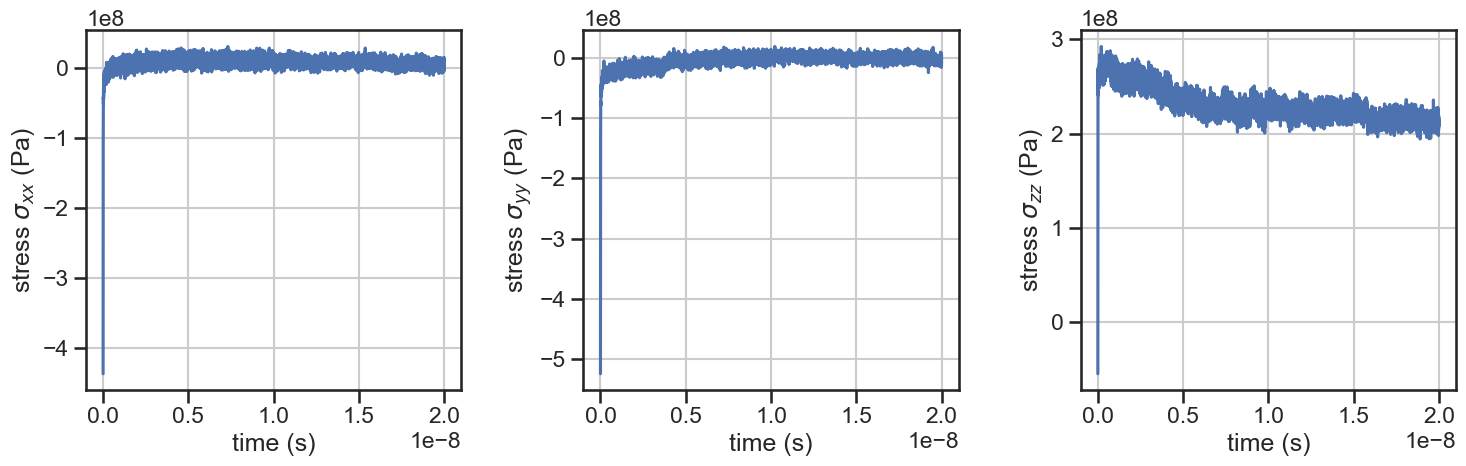

In [62]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  #hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  #hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  #hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

# Time-evolution of the potential energy

In [7]:
dict_simulations={
    "1/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "2/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/nvtrelaxation.thermodynamics.dat",
    "3/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/nvtrelaxation.thermodynamics.dat",
    "4/NVT": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/nvtrelaxation.thermodynamics.dat",
}

In [14]:
tdf = pd.DataFrame()
final_time_phase = 0.
for sim in dict_simulations:
    if float(sim[0]) > 3:
        dt=1.5e-15
    else:
        dt=1e-15
        
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt + final_time_phase
    final_time_phase=df["time"].iloc[-1]
    df["sim"] = sim[2:]
    df["phase"] = float(sim[0])
    tdf = pd.concat([tdf, df], ignore_index=True)

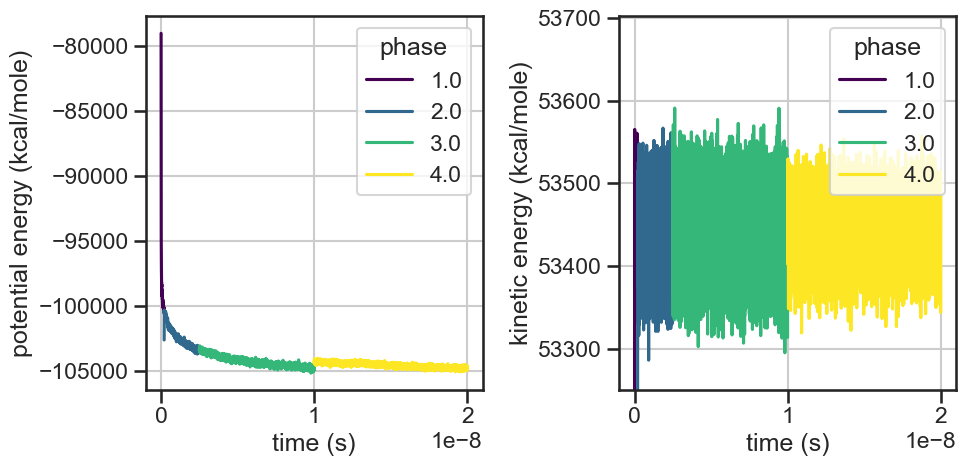

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='v_ppe', data=data, 
                  hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("potential energy (kcal/mole)")
ax[0].grid()
#
sns.lineplot(x="time", y='v_kke', data=data, 
                  hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("kinetic energy (kcal/mole)")
ax[1].set_ylim(ymin=53250)
ax[1].grid()

#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

# Influence of temperature on internal stresses

## Instant vs Progressive increase of temperature

In [40]:
dict_simulations={
    "instant": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/influence_temperature/nvt-heating-instant-338K/nvtheating.thermodynamics.dat",
    "progressive": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/influence_temperature/nvt-heating-progressive-338K/nvtheating.thermodynamics.dat",
}

In [41]:
tdf = pd.DataFrame()
dt=1.5e-15
for sim in dict_simulations:

    split_sim = sim.split("/")
    style = split_sim[0]
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    
    df["time"] = df["TimeStep"]*dt
    df["style"] = style
    tdf = pd.concat([tdf, df], ignore_index=True)

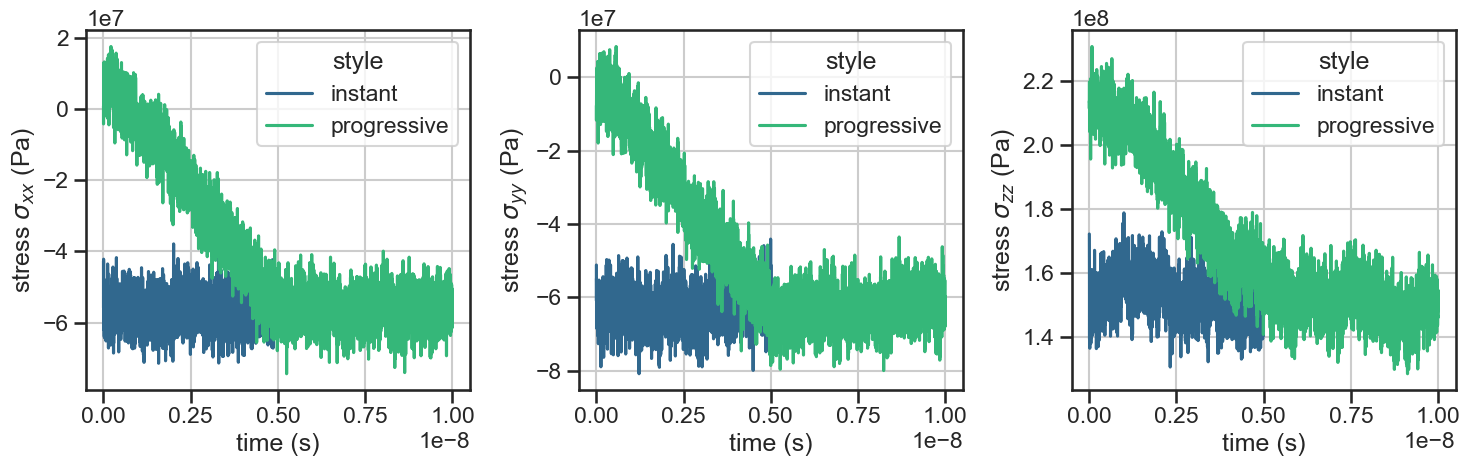

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#

#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

## Relaxation of stresses after heating

In [44]:
dict_simulations={
    "heating": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/influence_temperature/nvt-heating-progressive-338K/nvtheating.thermodynamics.dat",
    "relaxation": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/influence_temperature/nvt-heating-progressive-338K/extended/nvtheating.thermodynamics.dat",
}

In [50]:
tdf = pd.DataFrame()
dt=1.5e-15
last_timestep=0
for sim in dict_simulations:

    split_sim = sim.split("/")
    style = split_sim[0]
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    
    df["time"] = (df["TimeStep"]+last_timestep)*dt
    df["style"] = style
    last_timestep = df["TimeStep"].iloc[-1]
    tdf = pd.concat([tdf, df], ignore_index=True)

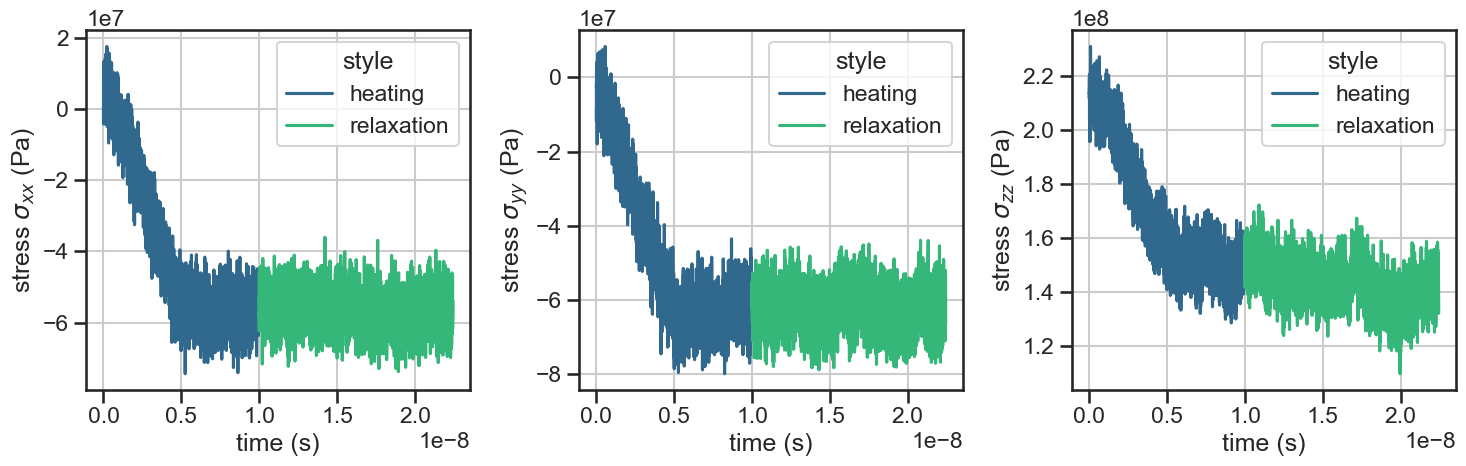

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="style",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#

#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

# Stress-strain relationship

## Influence of strain rate

In [71]:
dict_simulations={
    #"Deform/remapv/0.25e7/npt/0": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-20ns/nvt-deform.thermodynamics.dat",
    #"Deform/remapv/0.25e7/npt/1": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-20ns/extended/nvt-deform.thermodynamics.dat",
    "Deform/remapv/0.01/npt/0": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-5ns/nvt-deform.thermodynamics.dat",
    "Deform/remapv/0.0025/npt/0": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-20ns/nvt-deform.thermodynamics.dat",
}

In [72]:
tdf = pd.DataFrame()
dt=1.5e-15
final_time_phase = 0.0
name_rate="rate (ns$^{-1}$)"
for sim in dict_simulations:

    split_sim = sim.split("/")
    strain = split_sim[0]
    style = split_sim[1]
    rate = split_sim[2]
    constraint = split_sim[3]
    phase = np.int32(split_sim[4])
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    if phase == 0:
        final_time_phase = 0.0
        init_length = df["v_llz"].iloc[0]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["epsilon_zz"] = (df["v_llz"] - init_length)/init_length
    df["time"] = df["TimeStep"]*dt + final_time_phase
    final_time_phase=df["time"].iloc[-1]
    df["strain"] = strain
    df["style"] = style
    df[name_rate] = rate
    df["constraint"] = constraint
    tdf = pd.concat([tdf, df[df['epsilon_zz']<0.04]], ignore_index=True)

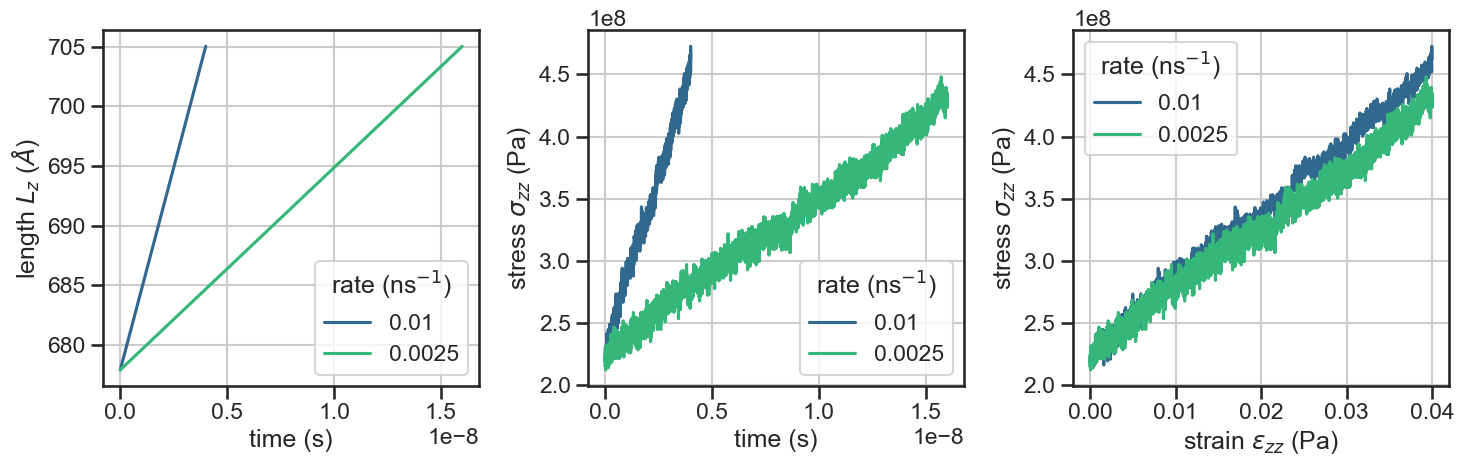

In [73]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='v_llz', data=data, 
                  hue=name_rate,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"length $L_{z}$ ($\AA$) ")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue=name_rate,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="epsilon_zz", y='sigma_zz', data=data, 
                  hue=name_rate,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel(r"strain $\epsilon_{zz}$ (Pa)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
#ax[2].set_legend(title=r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

## Influence of initial state

In [34]:
dict_simulations={
    "pre-strained/remapv/1e7/npt": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-5ns/nvt-deform.thermodynamics.dat",
    "relaxed/remapv/1e7/npt": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended//extended_10-20ns/nptrelaxation5ns/influence_mechanics/npt-deform-progressive-remapv-5ns/npt-deform.thermodynamics.dat",
}

In [35]:
tdf = pd.DataFrame()
dt=1.5e-15
final_time_phase = 0.0
name_state="initial state"
for sim in dict_simulations:

    split_sim = sim.split("/")
    init_state = split_sim[0]
    style = split_sim[1]
    strain_rate = np.float64(split_sim[2])
    constraint = split_sim[3]
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    
    init_length = df["v_llz"].iloc[0]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["epsilon_zz"] = (df["v_llz"] - init_length)/init_length
    df["time"] = df["TimeStep"]*dt
    final_time_phase=df["time"].iloc[-1]
    df[name_state] = init_state
    df["style"] = style
    df["strain_rate"] = strain_rate
    df["constraint"] = constraint
    tdf = pd.concat([tdf, df], ignore_index=True)

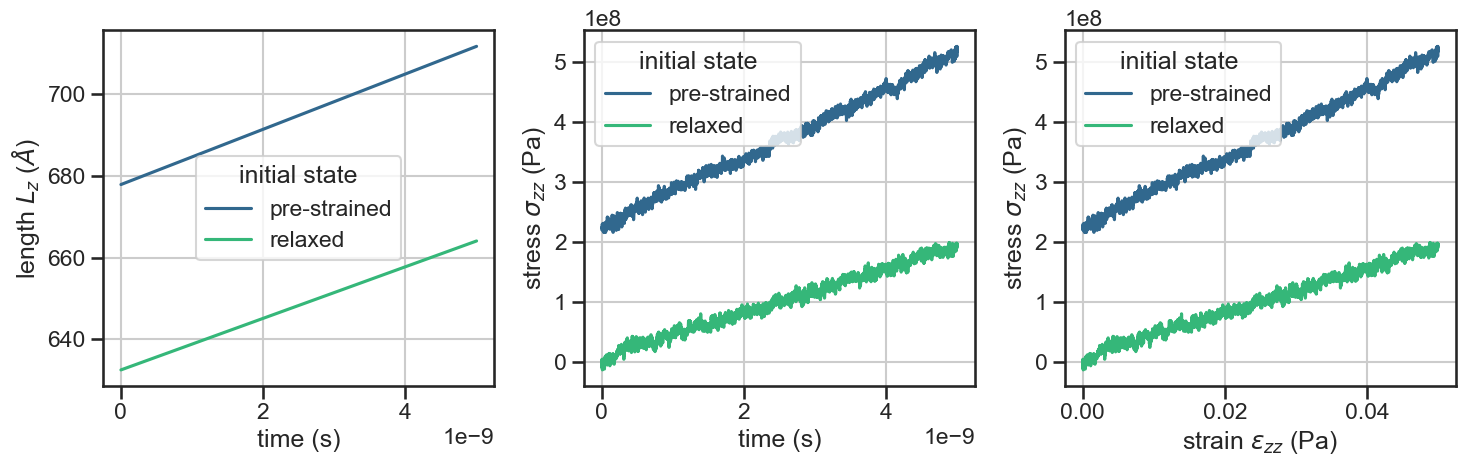

In [36]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='v_llz', data=data, 
                  hue=name_state,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"length $L_{z}$ ($\AA$) ")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue=name_state,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="epsilon_zz", y='sigma_zz', data=data, 
                  hue=name_state,
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel(r"strain $\epsilon_{zz}$ (Pa)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

## Influence of lateral constraints

In [10]:
dict_simulations={
    "Deform/remapx/5/fixed": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/nvt-deform-progressive-remapv-5ns/nvt-deform.thermodynamics.dat",
    "Deform/remapx/5/free": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-5ns/nvt-deform.thermodynamics.dat",
}

In [11]:
tdf = pd.DataFrame()
dt=1.5e-15
final_time_phase = 0.0
for sim in dict_simulations:

    split_sim = sim.split("/")
    strain = split_sim[0]
    style = split_sim[1]
    duration = np.float64(split_sim[2])
    constraint = split_sim[3]
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")

    init_length = df["v_llz"].iloc[0]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["epsilon_zz"] = (df["v_llz"] - init_length)/init_length
    df["time"] = df["TimeStep"]*dt
    final_time_phase=df["time"].iloc[-1]
    df["strain"] = strain
    df["style"] = style
    df["duration"] = duration
    df["ensemble"] = constraint
    tdf = pd.concat([tdf, df], ignore_index=True)

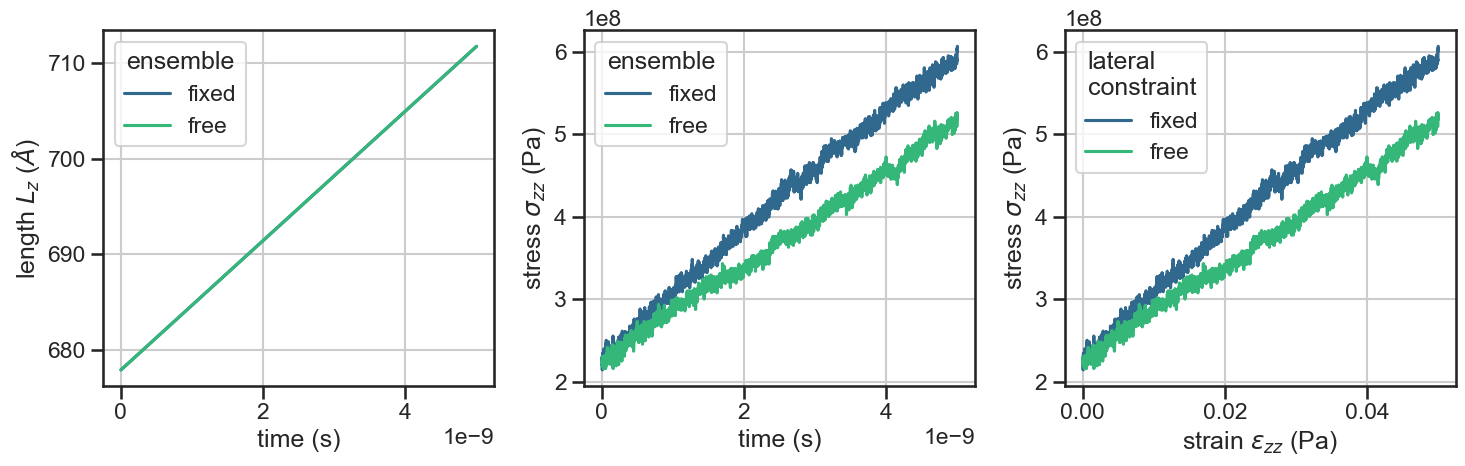

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='v_llz', data=data, 
                  hue="ensemble",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"length $L_{z}$ ($\AA$) ")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="ensemble",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="epsilon_zz", y='sigma_zz', data=data, 
                  hue="ensemble",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel(r"strain $\epsilon_{zz}$ (Pa)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

plt.legend(title="lateral\nconstraint")

#plt.grid()
plt.tight_layout()
plt.show()

## Up to 20% strain

In [15]:
dict_simulations={
    "Deform/remapv/1e7/npt/0": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-5ns/nvt-deform.thermodynamics.dat",
    "Deform/remapv/1e7/npt/1": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/influence_mechanics/npt-deform-progressive-remapv-5ns/extension0.20strain/nvt-deform.thermodynamics.dat",
}

In [16]:
tdf = pd.DataFrame()
dt=1.5e-15
final_time_phase = 0.0
for sim in dict_simulations:

    split_sim = sim.split("/")
    fix = split_sim[0]
    style = split_sim[1]
    rate = np.float64(split_sim[2])
    constraint = split_sim[3]
    phase = np.int32(split_sim[4])
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    if phase == 0:
        final_time_phase = 0.0
        init_length = df["v_llz"].iloc[0]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["epsilon_zz"] = (df["v_llz"] - init_length)/init_length
    df["time"] = df["TimeStep"]*dt + final_time_phase
    final_time_phase=df["time"].iloc[-1]
    df["fix"] = fix
    df["style"] = style
    df["rate"] = rate
    df["constraint"] = constraint
    df["phase"] = phase
    tdf = pd.concat([tdf, df], ignore_index=True)

/var/folders/c2/qkzjh63s6y535d1y102h4vcc0000gn/T/ipykernel_15669/2108901237.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="epsilon_zz", y='sigma_zz', data=data,


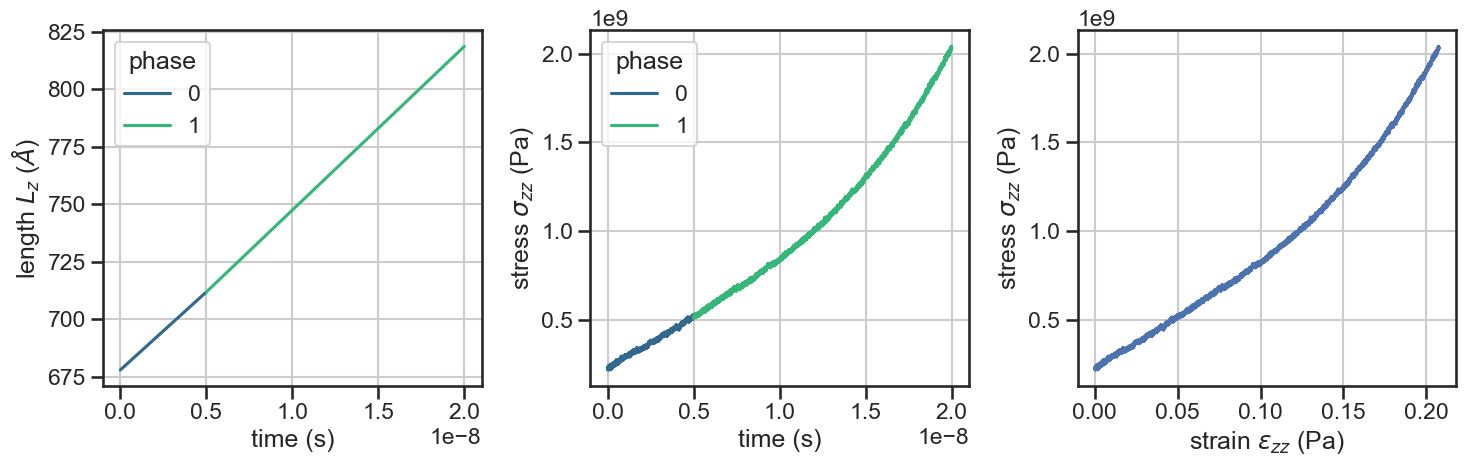

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf
#
sns.lineplot(x="time", y='v_llz', data=data, 
                  hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"length $L_{z}$ ($\AA$) ")
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[1].grid()
#
sns.lineplot(x="epsilon_zz", y='sigma_zz', data=data, 
                  #hue="phase",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel(r"strain $\epsilon_{zz}$ (Pa)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="boundary\n condition")

#plt.grid()
plt.tight_layout()
plt.show()

# Laser ablation and recoil

In [18]:
sim_dir = "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/extended_10-20ns/"
dict_simulations={
    "1/intact": "nvtrelaxation.short.lammpstrj",
    "2/cut": "laser_ablation/bak/nvtrelaxation.lammpstrj",
   }

In [19]:
tdf = pd.DataFrame()
#
for sim in dict_simulations:
    if sim[0]=="1":
        dt = 1.0e-12
    elif sim[0]=="2":
        dt = 1.0e-12
    u = mda.Universe(base_dir+sim_dir+"nvtrelaxation.nocmap.data", 
                     base_dir+sim_dir+dict_simulations[sim], 
                     format="LAMMPSDUMP",
                     dt=1.0)
    #print(u)
    #
    below_cut = u.select_atoms("type 12 and prop z <= 320.0 and prop z >= 315.0")
    above_cut = u.select_atoms("type 12 and prop z <= 330.0 and prop z >= 325.0")
    #
    i = 1
    for ts in u.trajectory:
        df_below = pd.DataFrame(below_cut.positions[:,2], columns=["z_positions"])
        df_below["group"] = "below"
        df_above = pd.DataFrame(above_cut.positions[:,2], columns=["z_positions"])
        df_above["group"] = "above"
        df = pd.concat([df_above, df_below])
        df["time"] = i*dt
        df["simulation"] = sim[2:]
        tdf = pd.concat([tdf, df])
        i = i + 1

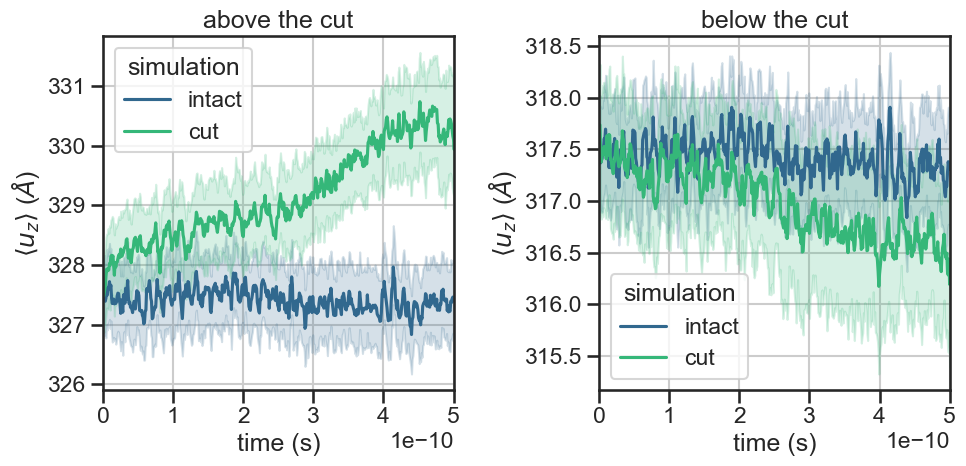

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data=tdf[tdf["group"]=="above"]
#
sns.lineplot(x="time", y='z_positions', data=data, 
                  hue="simulation",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"$\langle u_z \rangle$ ($\AA$)")
ax[0].set_xlim(xmin=0.0, xmax=5e-10)
#ax.set_ylim(ymin=-2e8, ymax=1e8)
ax[0].set_title("above the cut")
ax[0].grid()

data=tdf[tdf["group"]=="below"]
#
sns.lineplot(x="time", y='z_positions', data=data, 
                  hue="simulation",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"$\langle u_z \rangle$ ($\AA$)")
ax[1].set_xlim(xmin=0.0, xmax=5e-10)
#ax.set_ylim(ymin=-2e8, ymax=1e8)
ax[1].set_title("below the cut")
ax[1].grid()

#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="force field\n type")

#plt.grid()
plt.tight_layout()
plt.show()

# Influence of the force field

In [76]:
dict_simulations={
    "1/CHARMM-G/12600/Maxime": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/nvtrelaxation.thermodynamics.dat",
    "2/CHARMM-G/12600/Maxime": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/nvtrelaxation.thermodynamics.dat",
    "3/CHARMM-G/12600/Maxime": "colbuilder_homo-sapiens_nocross/replica5/6-nvtrelaxation/12600WAT/extended/extended/nvtrelaxation.thermodynamics.dat",
    "1/OPLS/11600/Kostas": "influence_ff/colbuilder_homo-sapiens_nocross_OPLS/6-nvtrelaxation/11600WAT/nvt.thermodynamics.colbuilder-homo-sapiens-nocross.dat",
    "1/OPLS/12100/Kostas": "influence_ff/colbuilder_homo-sapiens_nocross_OPLS/6-nvtrelaxation/12100WAT/nvt.thermodynamics.colbuilder-homo-sapiens-nocross.dat",
    "1/OPLS/12600/Kostas": "influence_ff/colbuilder_homo-sapiens_nocross_OPLS/6-nvtrelaxation/12600WAT/nvt.thermodynamics.colbuilder-homo-sapiens-nocross.dat",
    #"1/CHARMM-K/12600/Kostas": "influence_ff/colbuilder_homo-sapiens_nocross_CHARMM-KOSTAS/6-nvtrelaxation/12600WAT/nvt.thermodynamics.colbuilder-homo-sapiens-nocross.dat",
    #"1/CHARMM-G/12600/Kostas": "influence_ff/colbuilder_homo-sapiens_nocross_CHARMM-GUI/6-nvtrelaxation/12600WAT/nvt.thermodynamics.colbuilder-homo-sapiens-nocross.dat",
}

In [77]:
tdf = pd.DataFrame()
for sim in dict_simulations:
    split_sim = sim.split("/")
    phase = np.int32(split_sim[0])
    ff = split_sim[1]
    nwat = np.int32(split_sim[2])
    protocol = split_sim[3]
    
    dt=1.5e-15
        
    if phase == 1:
        final_time_phase = 0.
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt + final_time_phase
    final_time_phase=df["time"].iloc[-1]
    df["ff_type"] = ff
    df["water_count"] = nwat
    df["phase"] = phase
    tdf = pd.concat([tdf, df], ignore_index=True)

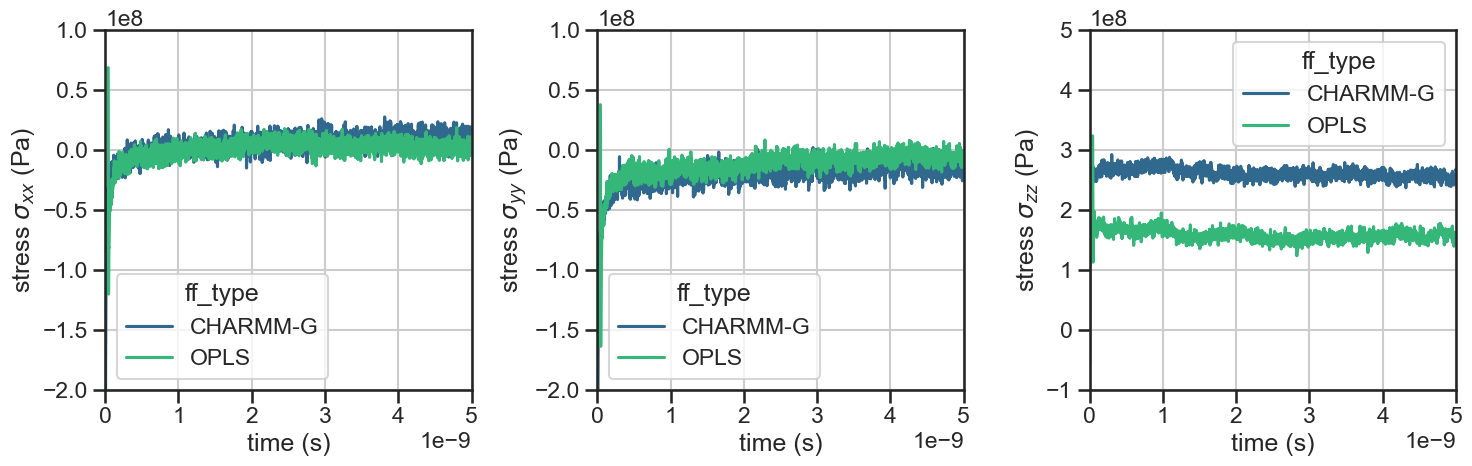

In [78]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data = tdf[(tdf["water_count"]==12600) & (tdf["ff_type"]=="CHARMM-G") | (tdf["water_count"]==12100) & (tdf["ff_type"]=="OPLS")]
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  hue="ff_type",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].set_xlim(xmin=0.0, xmax=5e-9)
ax[0].set_ylim(ymin=-2e8, ymax=1e8)
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  hue="ff_type",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].set_xlim(xmin=0.0, xmax=5e-9)
ax[1].set_ylim(ymin=-2e8, ymax=1e8)
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="ff_type",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].set_xlim(xmin=0.0, xmax=5e-9)
ax[2].set_ylim(ymin=-1e8, ymax=5e8)
ax[2].grid()
#


#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="force field\n type")

#plt.grid()
plt.tight_layout()
plt.show()

# Influence of hydration on internal stresses

In [101]:
dict_simulations={
    "CHARMM-K/10000/1": "influence_hydration/CHARMMGUI-KOSTAS/10000.thermodynamics.dat",
    "CHARMM-K/10500/1": "influence_hydration/CHARMMGUI-KOSTAS/10500.thermodynamics.dat",
    "CHARMM-K/11000/1": "influence_hydration/CHARMMGUI-KOSTAS/11000.thermodynamics.dat",
    "CHARMM-K/11500/1": "influence_hydration/CHARMMGUI-KOSTAS/11500.thermodynamics.dat",
    "CHARMM-K/12000/1": "influence_hydration/CHARMMGUI-KOSTAS/12000.thermodynamics.dat",
    "CHARMM-K/12500/1": "influence_hydration/CHARMMGUI-KOSTAS/12500.thermodynamics.dat",
    "CHARMM-K/12600/1": "influence_hydration/CHARMMGUI-KOSTAS/12600.thermodynamics.dat",
    "CHARMM-K/13000/1": "influence_hydration/CHARMMGUI-KOSTAS/13000.thermodynamics.dat",
    "CHARMM-K/13500/1": "influence_hydration/CHARMMGUI-KOSTAS/13500.thermodynamics.dat",
    "CHARMM-K/14000/1": "influence_hydration/CHARMMGUI-KOSTAS/14000.thermodynamics.dat",
    "CHARMM-K/14500/1": "influence_hydration/CHARMMGUI-KOSTAS/14500.thermodynamics.dat",
    "CHARMM-K/15000/1": "influence_hydration/CHARMMGUI-KOSTAS/15000.thermodynamics.dat",
    #"CHARMM-M/12601/1": "influence_hydration/CHARMMGUI/NWAT12601/REP1111/nvtrelaxation/nvtrelaxation.thermodynamics.dat",
    #"CHARMM-M/13000/1": "influence_hydration/CHARMMGUI/NWAT13000/REP1/nvtrelaxation-2/nvtrelaxation.thermodynamics.dat",
    #"CHARMM-M/14000/1": "influence_hydration/CHARMMGUI/NWAT14000/REP1/nvtrelaxation-2/nvtrelaxation.thermodynamics.dat",
    #"CHARMM-M/15000/1": "influence_hydration/CHARMMGUI/NWAT15000/REP1/nvtrelaxation-2/nvtrelaxation.thermodynamics.dat",
    "CHARMM-M/16000/1": "influence_hydration/CHARMMGUI/NWAT16000/REP1/nvtrelaxation/nvtrelaxation.thermodynamics.dat",
    "CHARMM-M/18000/1": "influence_hydration/CHARMMGUI/NWAT18000/REP1/nvtrelaxation/nvtrelaxation.thermodynamics.dat",
    "CHARMM-M/20000/1": "influence_hydration/CHARMMGUI/NWAT20000/REP1/nvtrelaxation/nvtrelaxation.thermodynamics.dat",
    "OPLS/14000/1": "influence_hydration/OPLS/NWAT14000/REP1/nvtrelaxation/nvtrelaxation.thermodynamics.dat",
 }

## Time evolution

In [65]:
tdf = pd.DataFrame()
for sim in dict_simulations:
    split_sim = sim.split("/")
    ff = split_sim[0]
    nwat = np.int32(split_sim[1])
    rep = np.int32(split_sim[2])
    
    dt=1.5e-15
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt
    df["ff_type"] = ff
    df["water_count"] = nwat
    df["replica"] = rep
    tdf = pd.concat([tdf, df], ignore_index=True)

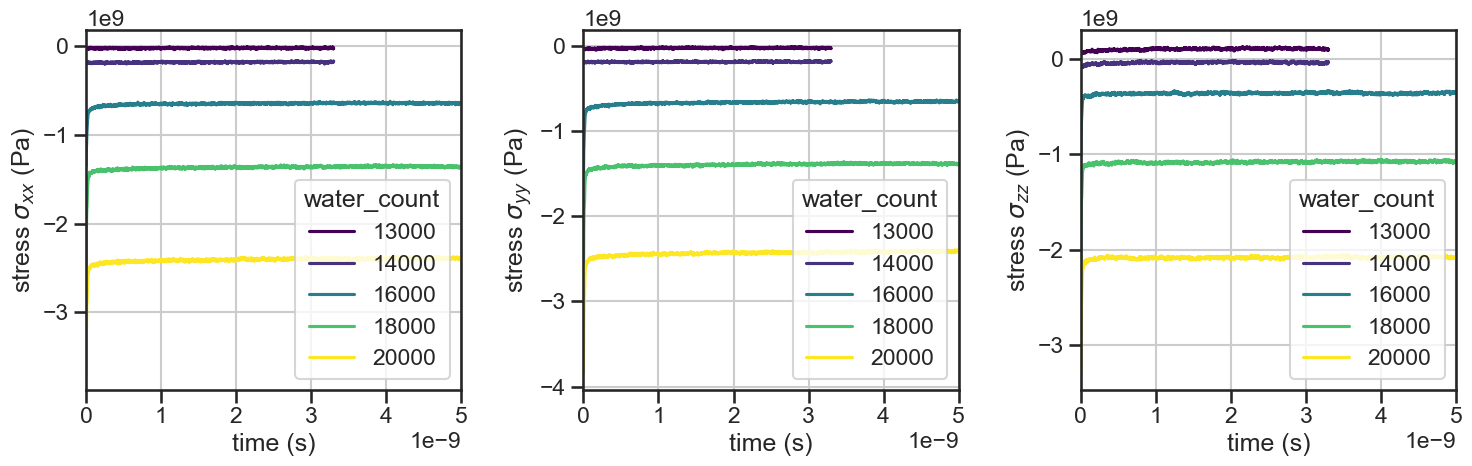

In [46]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

data = tdf #[(tdf["water_count"]==12600) & (tdf["ff_type"]=="CHARMM-G") | (tdf["water_count"]==12100) & (tdf["ff_type"]=="OPLS")]
#
sns.lineplot(x="time", y='sigma_xx', data=data, 
                  hue="water_count",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[0]
                 )
#
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel(r"stress $\sigma_{xx}$ (Pa)")
ax[0].set_xlim(xmin=0.0, xmax=5e-9)
#ax[0].set_ylim(ymin=-2e8, ymax=1e8)
ax[0].grid()
#
sns.lineplot(x="time", y='sigma_yy', data=data, 
                  hue="water_count",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[1]
                 )
#
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel(r"stress $\sigma_{yy}$ (Pa)")
ax[1].set_xlim(xmin=0.0, xmax=5e-9)
#ax[1].set_ylim(ymin=-2e8, ymax=1e8)
ax[1].grid()
#
sns.lineplot(x="time", y='sigma_zz', data=data, 
                  hue="water_count",
                  #style="state",
                  #markers=True, 
                  palette="viridis", 
                  #ci="sd", err_style="band",
                  ax=ax[2]
                 )
#
ax[2].set_xlabel("time (s)")
ax[2].set_ylabel(r"stress $\sigma_{zz}$ (Pa)")
ax[2].set_xlim(xmin=0.0, xmax=5e-9)
#ax[2].set_ylim(ymin=-1e8, ymax=5e8)
ax[2].grid()
#

#ax.set_ylim(ymin=0.0)
#ax.set_yscale("log")

#plt.legend(title="force field\n type")

#plt.grid()
plt.tight_layout()
plt.show()

## Evolution of averaged value with hydration

In [102]:
tdf = pd.DataFrame()
for sim in dict_simulations:
    split_sim = sim.split("/")
    ff = split_sim[0]
    nwat = np.int32(split_sim[1])
    rep = np.int32(split_sim[2])
    
    dt=1.5e-15
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    if ff.startswith("CHARMM"):
        df = df.iloc[-668:]
    else:
        df = df.iloc[-500:]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt
    df["ff_type"] = ff
    df["water_count"] = nwat
    df["hydration_degree"] = nwat*18/289270.4
    df["replica"] = rep
    tdf = pd.concat([tdf, df], ignore_index=True)

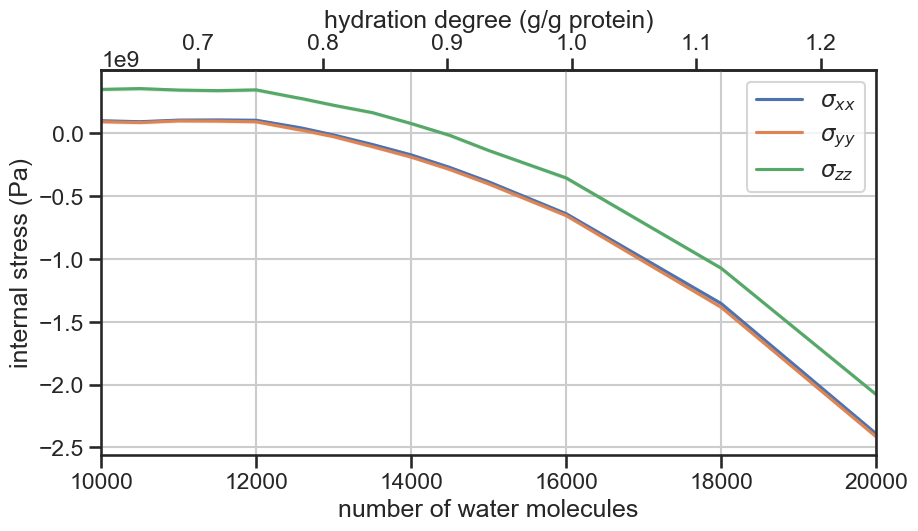

In [104]:
fig, ax = plt.subplots(figsize=(10,5))

data = tdf [tdf["ff_type"]!="OPLS"]

sns.lineplot(x="water_count", y='sigma_xx', data=data,
             errorbar="sd",
             label="$\\sigma_{xx}$",
             ax=ax
            )
sns.lineplot(x="water_count", y='sigma_yy', data=data,
             errorbar="sd",
             label="$\\sigma_{yy}$",
             ax=ax
            )
sns.lineplot(x="water_count", y='sigma_zz', data=data,
             errorbar="sd",
             label="$\\sigma_{zz}$",
             ax=ax
            )

ax.set_xlabel("number of water molecules")
ax.set_ylabel("internal stress (Pa)")
ax.set_xlim(xmin=10000,xmax=20000)

# Add secondary x-axis (proportional column)
def mols_to_degree(x):
    return x*18/289270.4  # conversion function
def degree_to_mols(x):
    return x*289270.4/18  # inverse

ax2 = ax.secondary_xaxis("top", functions=(mols_to_degree, degree_to_mols))
ax2.set_xlabel("hydration degree (g/g protein)")

plt.grid()
plt.show()

## Role of the force field

In [94]:
tdf = pd.DataFrame()
for sim in dict_simulations:
    split_sim = sim.split("/")
    ff = split_sim[0]
    nwat = np.int32(split_sim[1])
    rep = np.int32(split_sim[2])
    
    dt=1.5e-15
    
    # Load the CSV file
    fdata = base_dir+dict_simulations[sim]
    
    # Step 1: Open the file and manually grab headers from the second line
    with open(fdata, 'r') as f:
        f.readline()  # Skip first line
        headers_line = f.readline().strip().split(' ')  # Read second line
        headers = headers_line[1:]  # Skip first item
    
    # Step 2: Load the rest of the file into a DataFrame
    df = pd.read_csv(fdata, skiprows=2, names=headers, sep=" ")
    if ff=="OPLS":
        df = df.iloc[-500:]
    else:
        df = df.iloc[-668:]
        
    df["sigma_xx"] = df["v_ppx"]*(-1*101325)
    df["sigma_yy"] = df["v_ppy"]*(-1*101325)
    df["sigma_zz"] = df["v_ppz"]*(-1*101325)
    df["time"] = df["TimeStep"]*dt
    df["ff_type"] = ff
    df["water_count"] = nwat
    df["hydration_degree"] = nwat*18/289270.4
    df["replica"] = rep
    tdf = pd.concat([tdf, df], ignore_index=True)

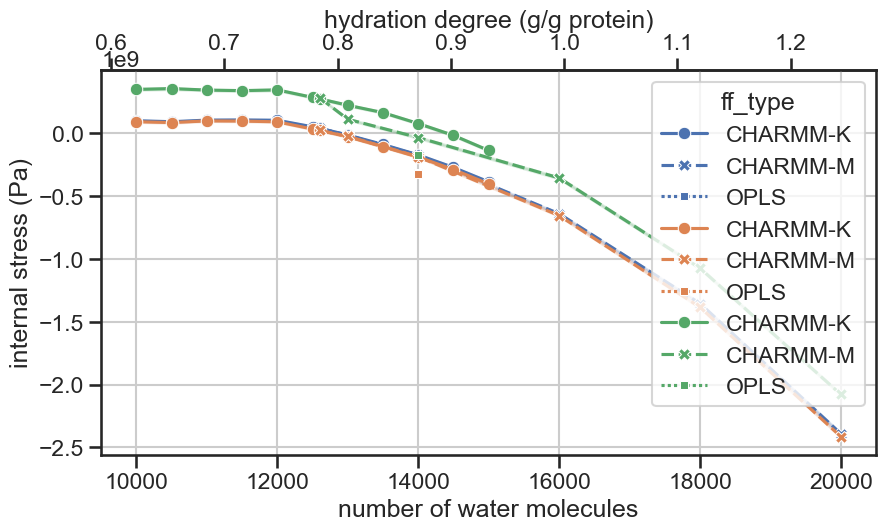

In [96]:
fig, ax = plt.subplots(figsize=(10,5))

data = tdf

sns.lineplot(x="water_count", y='sigma_xx', data=data,
             style="ff_type",
             markers=True, 
             errorbar="sd",
             #label="$\\sigma_{xx}$",
             ax=ax
            )
sns.lineplot(x="water_count", y='sigma_yy', data=data,
             style="ff_type",
             markers=True, 
             errorbar="sd",
             #label="$\\sigma_{yy}$",
             ax=ax
            )
sns.lineplot(x="water_count", y='sigma_zz', data=data,
             style="ff_type",
             markers=True, 
             errorbar="sd",
             #label="$\\sigma_{zz}$",
             ax=ax
            )

ax.set_xlabel("number of water molecules")
ax.set_ylabel("internal stress (Pa)")

# Add secondary x-axis (proportional column)
def mols_to_degree(x):
    return x*18/289270.4  # conversion function
def degree_to_mols(x):
    return x*289270.4/18  # inverse

ax2 = ax.secondary_xaxis("top", functions=(mols_to_degree, degree_to_mols))
ax2.set_xlabel("hydration degree (g/g protein)")

plt.grid()
plt.show()

# Local stresses

In [13]:
data_nvt="./local_stresses/cleaner_version/NVT_col/virial_stresses_collagen.scan.d120.3.txt"
data_npt="./local_stresses/NPT_col/virial_stresses_collagen.scan.d120.4750ps.txt"

In [14]:
# stress of interest
stress_name='ZZ-Stress [MPa]'

# Read datasets
df_nvt = pd.read_csv(data_nvt, sep='         ', engine='python')
df_npt = pd.read_csv(data_npt, sep='         ', engine='python')

# Add dataset identifier
df_nvt['ensemble'] = 'NVT'
df_npt['ensemble'] = 'NPT'

# Combine datasets
df_combined = pd.concat([df_nvt, df_npt], ignore_index=True)

# Convert stress_zz to MPa
df_combined[stress_name]/=-10

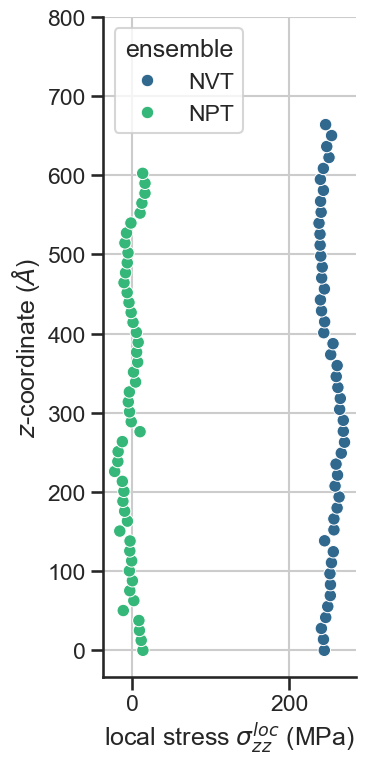

In [15]:
# Create the plot
fig, ax = plt.subplots(figsize=(4, 8))
sns.set_theme(style="ticks")
sns.set_context("talk", font_scale=1)

# Create scatter plot with Viridis palette
sns.scatterplot(
    data=df_combined,
    x='ZZ-Stress [MPa]',
    y='Box Axis [A]',
    hue='ensemble',
    palette='viridis',
    ax=ax,
    #s=100,
    #alpha=0.7
)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add arrowheads to left and bottom spines
ax.spines['left'].set_capstyle('projecting')
ax.spines['bottom'].set_capstyle('projecting')

ax.set_xlabel(r'local stress $\sigma^{loc}_{zz}$ (MPa)')
ax.set_ylabel(r'$z$-coordinate ($\AA$)')
ax.set_ylim(ymax=800)
ax.legend(loc="upper left", title='ensemble')
plt.tight_layout()
plt.grid()
plt.show()